# KNN Insolvenzvorhersage Reiseunternehmen

Im ersten Schritt werden die benötigten Pakete importiert

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Ausgabe der ersten paar Datensätze, es sind 10 Features und die Zielklasse abgebildet. Schauen Sie sich die Features an und interpretieren Sie deren Bedeutung. Was gibt Ihnen der describe() Befehl aus?

In [19]:
df = pd.read_csv('KNN_Project_Data.txt')
df.head()

,Personalwesen,Flottenmanagement,Infrastruktur,Reisebüros,Fuhrpark,Buchungsvolumen,Miete,Strom,Versicherung,Steuern,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [20]:
df.describe()

,Personalwesen,Flottenmanagement,Infrastruktur,Reisebüros,Fuhrpark,Buchungsvolumen,Miete,Strom,Versicherung,Steuern,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


Die Werte der Features werden auf eine Skala gebracht, um Abstände messen zu können, die Zielklasse wird abgetrennt. 

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS', axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled.head()

,Personalwesen,Flottenmanagement,Infrastruktur,Reisebüros,Fuhrpark,Buchungsvolumen,Miete,Strom,Versicherung,Steuern
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


Wenden Sie dann einmal den StandardScaler an und einmal den MinMaxScaler. Recherchieren Sie deren jeweilige Funktionsweise und vergleichen Sie die Ergebnisse.


In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(df.drop('TARGET CLASS', axis=1))
scaled_features_minmax = scaler_minmax.transform(df.drop('TARGET CLASS', axis=1))
df_scaled_minmax = pd.DataFrame(scaled_features_minmax, columns=df.columns[:-1])
df_scaled_minmax.head()

,Personalwesen,Flottenmanagement,Infrastruktur,Reisebüros,Fuhrpark,Buchungsvolumen,Miete,Strom,Versicherung,Steuern
0,0.770817,0.370309,0.804966,0.418262,0.299981,0.575371,0.668665,0.236991,0.640471,0.266258
1,0.473432,0.258509,0.829789,0.325119,0.644450,0.743626,0.259619,0.323978,0.509108,0.271472
2,0.610195,0.371486,0.633395,0.618149,0.509431,0.912970,0.248643,0.621579,0.846534,0.528528
3,0.495354,0.486051,0.184296,0.564674,0.226209,0.237874,0.259449,0.245162,0.492291,0.464354
4,0.475788,0.600833,0.291857,0.856246,0.464847,0.485566,0.276074,0.481590,0.224672,0.611149


In [34]:
df_scaled_minmax.describe()

,Personalwesen,Flottenmanagement,Infrastruktur,Reisebüros,Fuhrpark,Buchungsvolumen,Miete,Strom,Versicherung,Steuern
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.493313,0.451165,0.475692,0.581743,0.519788,0.550694,0.483257,0.409290,0.463862,0.464873
std,0.177009,0.182432,0.203382,0.170688,0.194879,0.178474,0.189191,0.184805,0.175241,0.185779
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.356061,0.313047,0.327425,0.470191,0.384680,0.430852,0.347700,0.275076,0.338865,0.336355
50%,0.488940,0.444889,0.473511,0.587828,0.519089,0.555887,0.484799,0.393656,0.468223,0.461286
75%,0.622615,0.583091,0.622365,0.707759,0.656114,0.674127,0.616231,0.532128,0.586091,0.599558
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Die Features und die Zielklassen werden in eigene Variablen X und y überführt.

In [22]:
X = df_scaled
y = df['TARGET CLASS']
X.head()

,Personalwesen,Flottenmanagement,Infrastruktur,Reisebüros,Fuhrpark,Buchungsvolumen,Miete,Strom,Versicherung,Steuern
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [23]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: TARGET CLASS, dtype: int64

Die Daten werden in Test und Trainingsdaten unterteilt  

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

### Der KNN Klassifizierer wird importiert und die Vorhersage wird zunächst für k=1 durchgeführt.

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

Die Confusion Matrix wird verwendet, um die Vorhersage evaluieren zu können. Dort sieht man auf der Diagonalen, wie viele Daten richtig klassifiziert wurden. 

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, prediction))
confusion_matrix(y_test, prediction)

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



array([[109,  43],
       [ 41, 107]])

# Confusion Matrix

- oben links = true negative
- oben rechts = false negative
- unten links = false positive
- unten rechts = true positive

---

- Wenn man eine "perfekte" Confusion Matrix hat, dann ist irgendetwas falsch, das gibt es nämlich nicht
- Das Ergebnis ist abhängig vom "Kontext", bekommt ein schlechter Kunde eine E-Mail für einen guten Kunden, dann ist das nicht weiter tragisch
- Im medizinischen Kontext ist die Bewertung kritischer.
- Je größer das K, desto besser werden Ausreißer gefiltert (? -> bin ich mir nicht ganz sicher)

Nun wollen wir ein geeignetes k finden. Dazu schauen wir uns die Error Rate für verschiedene k an.

Text(0, 0.5, 'Error Rate')

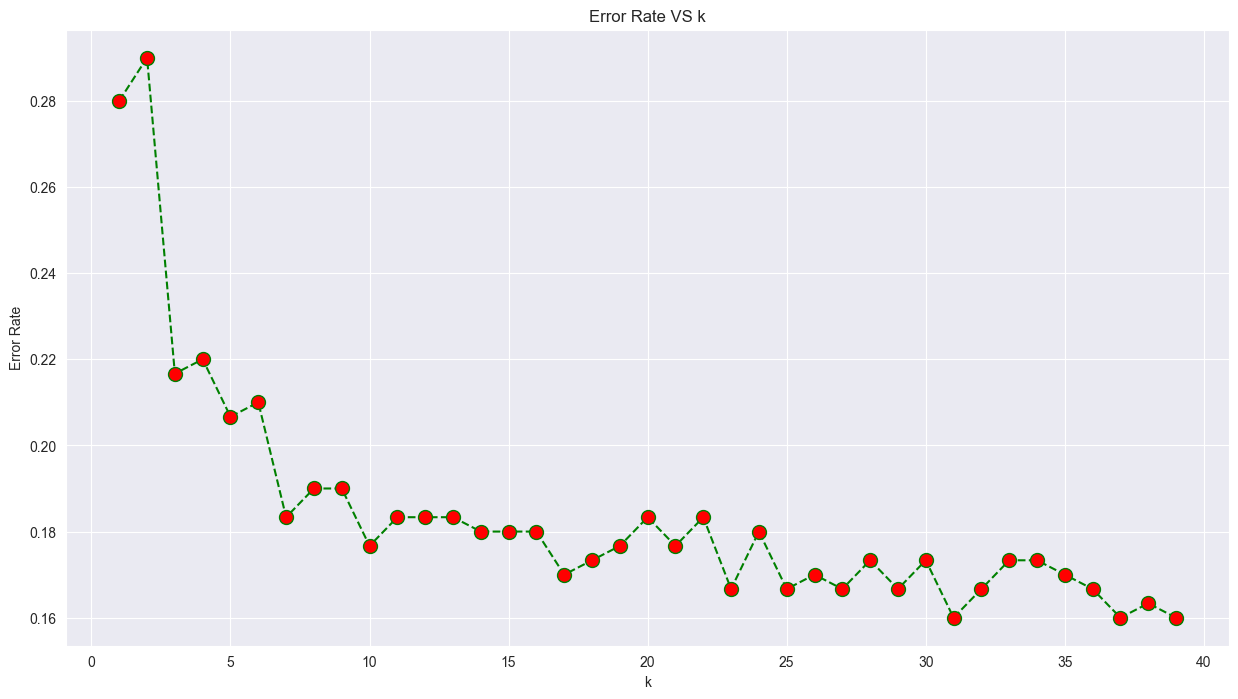

In [27]:
error_rate=[]
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    prediction_i = knn.predict(X_test)
    error_rate.append(np.mean(prediction_i != y_test))
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
plt.plot(range(1,40), error_rate, marker='o', markerfacecolor='red', linestyle='dashed', color='green', markersize=10)
plt.title('Error Rate VS k')
plt.xlabel('k')
plt.ylabel('Error Rate')

Mit welchem Wert für k erreichen Sie die höchste Vorhersagegenauigkeit? Bei welchem Wert liegt diese? Trainieren Sie das Modell erneut mit dem gefundenen Wert für k und schauen Sie sich nun die Confusion Matrix erneut an.

Ist das ein sinnvoller Wert?